# Environmental data examination

This notebook sets environmental data in context with the computed *dv/v* as in Makus et al., 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
def feet2meters(column_in_feet):
    """
    Convert a Pandas DataFrame column from feet to meters.
    
    Parameters:
        column_in_feet (pandas.Series): The Pandas DataFrame column in feet.

    Returns:
        pandas.Series: The converted column in meters.
    """
    # Conversion factor: 1 foot = 0.3048 meters
    conversion_factor = 0.3048
    
    # Use the conversion factor to convert the column
    column_in_meters = column_in_feet * conversion_factor
    
    return column_in_meters

def inch2meter(column_in_inch):
    """
    Convert a Pandas DataFrame column from inches to meters.
    
    Parameters:
        column_in_inches (pandas.Series): The Pandas DataFrame column in inches.

    Returns:
        pandas.Series: The converted column in meters.
    """
    # Conversion factor: 1 inch = 0.0254 meters
    conversion_factor = 0.0254
    
    # Use the conversion factor to convert the column
    column_in_meters = column_in_inch * conversion_factor
    
    return column_in_meters

def fahrenheit2celsius(column_in_fahrenheit):
    """
    Convert degrees Fahrenheit to degrees Celsius.
    
    Parameters:
        degrees_fahrenheit (float or pandas.Series): Temperature in degrees Fahrenheit.

    Returns:
        float or pandas.Series: Temperature in degrees Celsius.
    """
    # Conversion formula: Celsius = (Fahrenheit - 32) * 5/9
    degrees_celsius = (column_in_fahrenheit - 32) * 5/9
    
    return degrees_celsius


In [3]:
lakelevel = pd.read_csv('cliamte data/lakelevel.csv', index_col='Date', parse_dates=True)
ll_meters = feet2meters(lakelevel['LakeLevel(feet)'])
lakelevel['LakeLevel(meter)'] = ll_meters
lakelevel['rel_LakeLevel(meter)'] = lakelevel['LakeLevel(meter)'] - min(lakelevel['LakeLevel(meter)'])
lakelevel

,LakeLevel(feet),LakeLevel(meter),rel_LakeLevel(meter)
Date,,,
2000-01-01,3444.64,1049.926272,2.121408
2000-01-02,3444.61,1049.917128,2.112264
2000-01-03,3444.53,1049.892744,2.087880
2000-01-04,3444.65,1049.929320,2.124456
2000-01-05,3444.60,1049.914080,2.109216
...,...,...,...
2023-12-22,3444.62,1049.920176,2.115312
2023-12-23,3444.55,1049.898840,2.093976
2023-12-24,3444.51,1049.886648,2.081784


In [4]:
borehole = pd.read_csv('climate data/Water_level_depth_LSD.csv',
                        skiprows=14, index_col='ISO 8601 UTC', parse_dates=True)
borehole_meters = feet2meters(borehole['Value'])
borehole['borehole(meter)'] = borehole_meters
borehole['rel_borehole(meter)'] = max(borehole['borehole(meter)']) - borehole['borehole(meter)']
borehole['rel_borehole(meter)'] = borehole['rel_borehole(meter)']+1
borehole

,Timestamp (UTC-08:00),Value,Approval Level,Grade,Qualifiers,borehole(meter),rel_borehole(meter)
ISO 8601 UTC,,,,,,,
2019-11-21 21:00:00+00:00,2019-11-21 13:00:00,41.980000,Working,50.0,NaN,12.795504,1.356746
2019-11-21 21:15:00+00:00,2019-11-21 13:15:00,41.990029,Working,50.0,NaN,12.798561,1.353690
2019-11-21 21:30:00+00:00,2019-11-21 13:30:00,41.990057,Working,50.0,NaN,12.798569,1.353681
2019-11-21 21:45:00+00:00,2019-11-21 13:45:00,41.990086,Working,50.0,NaN,12.798578,1.353672
2019-11-21 22:00:00+00:00,2019-11-21 14:00:00,42.000115,Working,50.0,NaN,12.801635,1.350615
...,...,...,...,...,...,...,...
2024-01-18 23:45:00+00:00,2024-01-18 15:45:00,33.360000,Working,50.0,NaN,10.168128,3.984122
2024-01-19 00:00:00+00:00,2024-01-18 16:00:00,33.350000,Working,50.0,NaN,10.165080,3.987170
2024-01-19 00:15:00+00:00,2024-01-18 16:15:00,33.360000,Working,50.0,NaN,10.168128,3.984122


In [5]:
weather = pd.read_csv('climate data/usda_mt_st_helens_weather.csv',
                     skiprows=60, index_col='Date', parse_dates=True)
# Add 8 hours to the index local to UTC
weather.index = weather.index + pd.Timedelta(hours=8)
SWE_meters = inch2meter(weather['Snow Water Equivalent (in)'])
SDE_meters = inch2meter(weather['Snow Depth (in)'])
pre_meters = inch2meter(weather['Precipitation Accumulation (in)'])
temp_meters = fahrenheit2celsius(weather['Air Temperature Observed (degF)'])

weather['Snow Water Equivalent (m)'] = SWE_meters
weather['Snow Water Equivalent (m)'] = weather['Snow Water Equivalent (m)'].mask(weather['Snow Water Equivalent (m)'] < 0, np.nan)
weather['Snow Depth (m)'] = SDE_meters
weather['Snow Depth (m)'] = weather['Snow Depth (m)'].mask(weather['Snow Depth (m)'] < 0, np.nan)
weather['Precipitation Accumulation (m)'] = pre_meters
weather['Air Temperature Observed (degC)'] = temp_meters

weather

,Snow Water Equivalent (in),Snow Depth (in),Precipitation Accumulation (in),Air Temperature Observed (degF),Snow Water Equivalent (m),Snow Depth (m),Precipitation Accumulation (m),Air Temperature Observed (degC)
Date,,,,,,,,
2002-08-13 08:00:00,0.0,NaN,0.0,NaN,0.00000,NaN,0.00000,NaN
2002-08-13 22:00:00,0.0,-1.0,0.0,106.2,0.00000,NaN,0.00000,41.222222
2002-08-13 23:00:00,0.1,-1.0,0.1,99.7,0.00254,NaN,0.00254,37.611111
2002-08-14 00:00:00,0.1,-1.0,0.1,98.4,0.00254,NaN,0.00254,36.888889
2002-08-14 01:00:00,0.1,-1.0,0.1,95.9,0.00254,NaN,0.00254,35.500000
...,...,...,...,...,...,...,...,...
2023-11-28 13:00:00,10.8,7.0,47.8,37.0,0.27432,0.1778,1.21412,2.777778
2023-11-28 14:00:00,10.9,7.0,47.8,33.8,0.27686,0.1778,1.21412,1.000000
2023-11-28 15:00:00,10.9,7.0,47.8,34.5,0.27686,0.1778,1.21412,1.388889


In [7]:
# open the stacked dv/v time series
from seismic.monitor.dv import read_dv
from obspy.signal.filter import highpass
import glob

from obspy import UTCDateTime

infile = 'dv/with_sim_mat/UW_average_{freq}.npz'
dv = {}

for freq in [0.25, 0.5, 1.0]:
    dv_av = read_dv(infile.format(freq=freq))
    nani = np.isnan(dv_av.corr)
    df = dv_av.stats.corr_start[1]-dv_av.stats.corr_start[0]
    filtfreq = 1/(365.25*24*60*60*5)
    dv_single = highpass(
        np.nan_to_num(dv_av.value, copy=True), filtfreq, df, corners=4, zerophase=True)
    dv_single = dv_av.value
    
    dv_single = dv_single[~nani]
    # w, h = signal.freqs(b, a)
    # dv_single =dv_av.value[dv_av.avail]
    date_single = [UTCDateTime(_t).datetime for _t in np.array(dv_av.stats.corr_start)[dv_av.avail]]
    dv[freq] = dv_single

/tmp/ipykernel_204621/3791235178.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


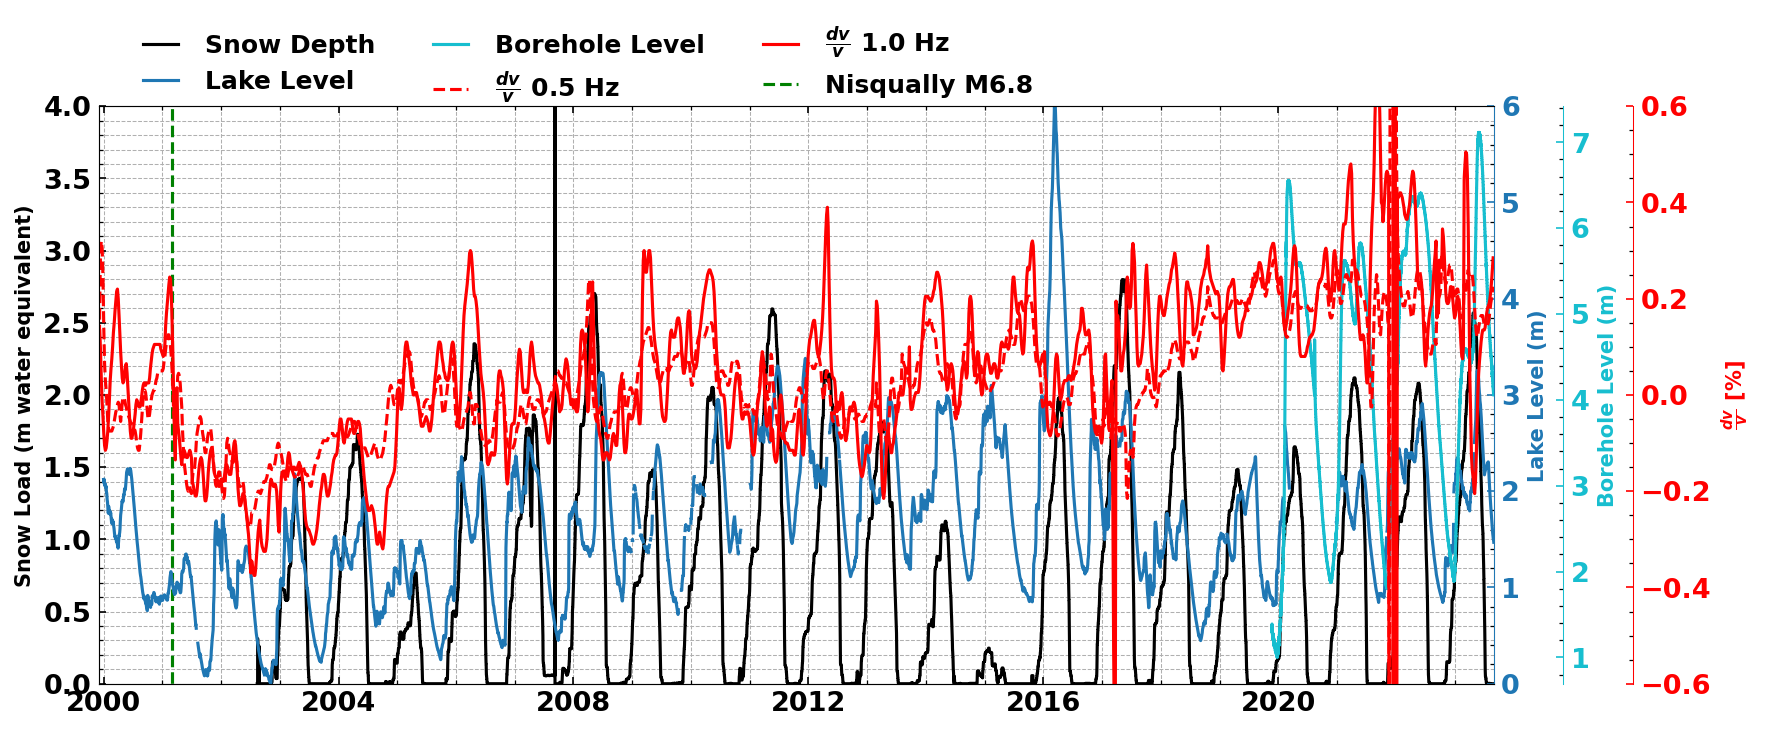

In [8]:
from seismic.plot.plot_utils import set_mpl_params
import os
set_mpl_params()

# crate figure lake level--------------------------------------------------------------------------------------------------------------------------
# fig, (ax2) = plt.subplots(1,1, sharex=True, figsize=(6.4*2, 4.8*0.5))
fig, (ax2) = plt.subplots(1,1, sharex=True, figsize=(12, 5))


ax2.plot(weather['Snow Water Equivalent (m)'].rolling('10D').median(), label ='Snow Depth', alpha=1, color='k')
ax2.plot(np.nan, label='Lake Level', alpha=1, color='C0')
ax2.plot(np.nan, label='Borehole Level', alpha=1, color='C9')
# ax2.plot(np.nan, color='r', label=r'$\frac{dv}{v}$ 0.25 Hz', linestyle=':')
ax2.plot(np.nan, color='r', label=r'$\frac{dv}{v}$ 0.5 Hz', linestyle='--')
ax2.plot(np.nan, color='r', label=r'$\frac{dv}{v}$ 1.0 Hz')
neq = UTCDateTime('2001-02-28 18:54:32').datetime
ax2.vlines(neq, -10, 10, colors=['g'], linestyles='dashed', label='Nisqually M6.8')

ax22 = ax2.twinx()
ax22.plot(lakelevel['rel_LakeLevel(meter)'], label ='Lake Level', alpha=1, color='C0')
ax222 = ax2.twinx()
ax222.plot(borehole['rel_borehole(meter)'], label ='Borehole Level', alpha=1, color='C9')

ax2222 = ax2.twinx()
# ax2222.plot(date_single, -100*dv[0.25], color='r', label=r'$\frac{dv}{v}$ 0.25 Hz', linestyle=':')
ax2222.plot(date_single, -100*dv[0.5], color='r', label=r'$\frac{dv}{v}$ 0.5 Hz', linestyle='--')
ax2222.plot(date_single, -100*dv[1.0], color='r', label=r'$\frac{dv}{v}$ 1.0 Hz')


# color ticks and spines
ax22.spines['right'].set_color('C0')
ax22.xaxis.label.set_color('C0')
ax22.tick_params(axis='y', colors='C0')

ax222.spines.right.set_position(("axes", 1.05))
ax222.spines['right'].set_color('C9')
ax222.xaxis.label.set_color('C9')
ax222.tick_params(axis='y', colors='C9')

ax2222.spines.right.set_position(("axes", 1.1))
ax2222.spines['right'].set_color('r')
ax2222.xaxis.label.set_color('r')
ax2222.tick_params(axis='y', colors='r')

    
# title, legende, and scale ------------------------------------------------------------------------------------------------------------
# ax1.set_title('Station {}'.format(sta))
# ax1.legend(loc='center left')
ax2.legend(loc='upper left', bbox_to_anchor=(.01, 1.18), ncol=3)
# plot legend outside

# linear y-axis
ax2.set_ylabel('Snow Load (m water equivalent)')
ax2.set_ylim(0,4)
ax22.set_ylabel('Lake Level (m)', color='C0')
ax22.set_ylim(0,6)
ax222.set_ylabel('Borehole Level (m)', color='C9')
ax2222.set_ylabel(r'$\frac{dv}{v}$ [%]', color='r')
ax2222.set_ylim(-.6, .6)

ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax2.set_xlim(datetime.datetime(2015,1,1), datetime.datetime(2023,1,1))
# vertical line for NIsqually earthquake

# origin time of the Nisqually earthquake

outfile = os.path.join(
        'aper/figures/waterlevel.pdf')
plt.xlim(datetime.datetime(1999,12,1), datetime.datetime(2023,9,1))

fig.savefig(outfile, dpi=300, bbox_inches='tight', facecolor='None')
fig.show()

## temperature

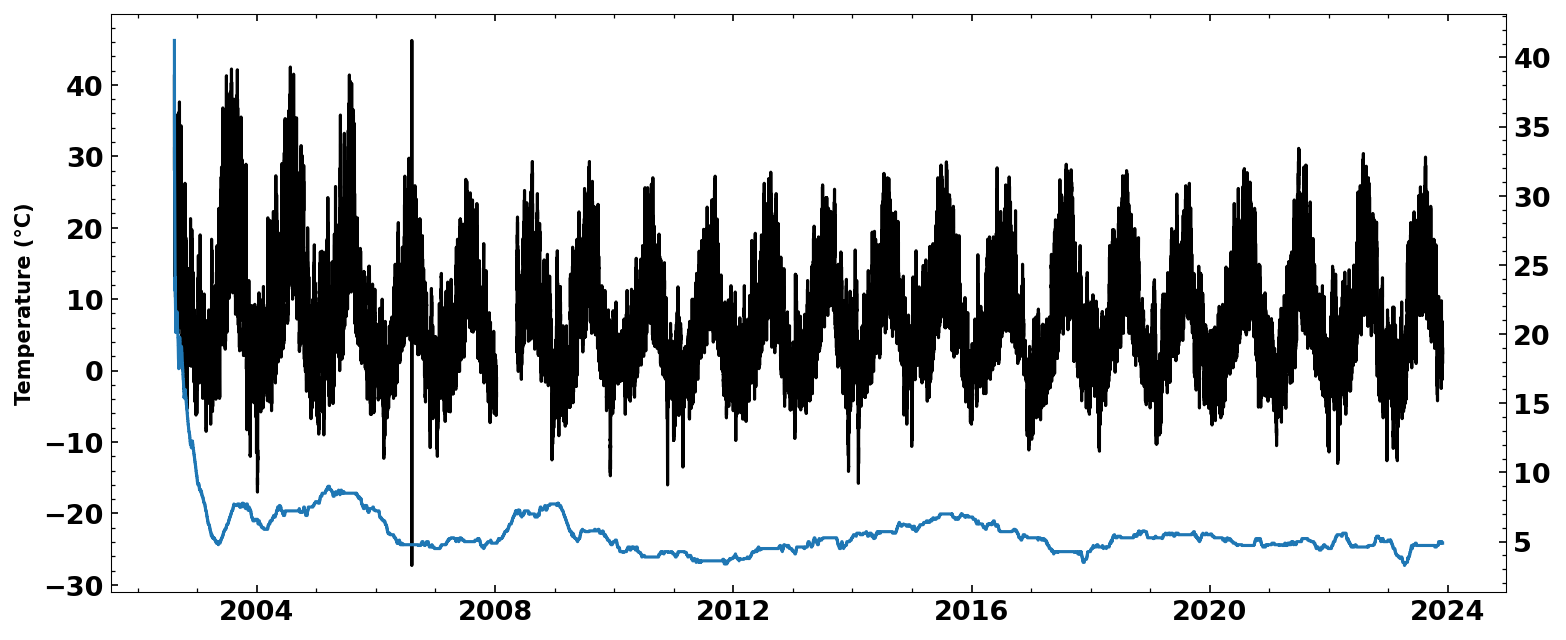

In [13]:
# plot temperature/4 and 
fig, (ax1) = plt.subplots(1,1, sharex=True, figsize=(12, 5))
ax1.plot(weather['Air Temperature Observed (degC)'], label ='Air Temperature', alpha=1, color='k')
ax1.set_ylabel('Temperature (°C)')


In [32]:


from numpy import interp


years = np.array([_date.year for _date in weather.index])
doy = np.array([UTCDateTime(_date).julday for _date in weather.index])
years_unique = np.unique(years)

x_data = []
y_data = []
years_unique = np.arange(2007, 2024)
for year in years_unique:
    # collect data to compute median
    x_data.append(doy[years==year])
    y_data.append(weather['Air Temperature Observed (degC)'][years==year])

# intepolate all these curves for the same doys
xq = np.arange(1, 366)
yq = np.zeros((len(years_unique), len(xq)))
for ii, (x_datum, y_datum) in enumerate(zip(x_data, y_data)):
    yq[ii] = \
        np.interp(xq, x_datum, y_datum)

annual_T = yq


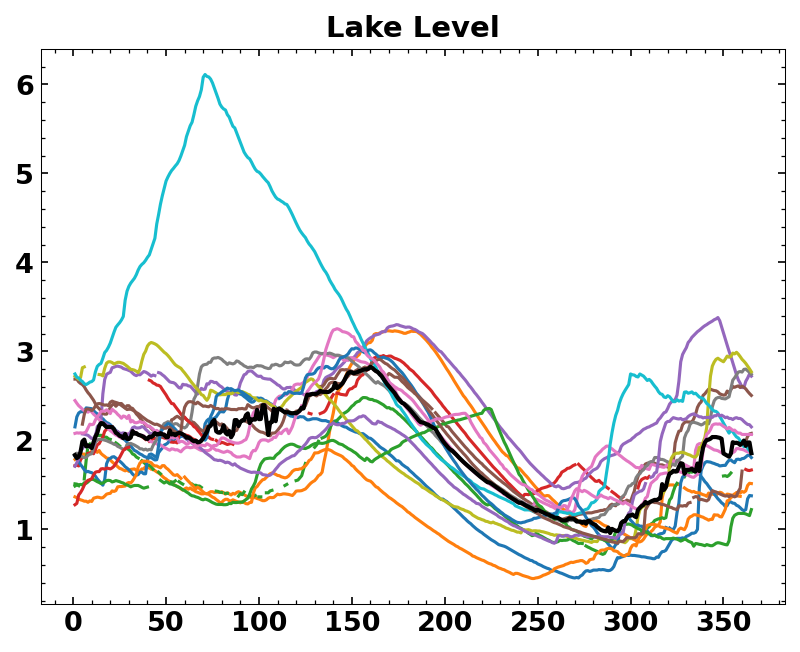

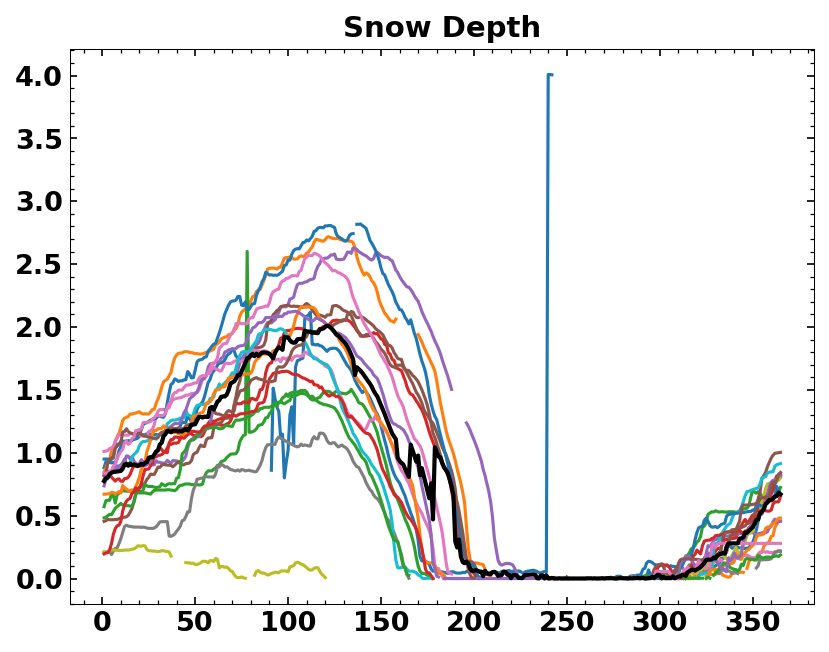

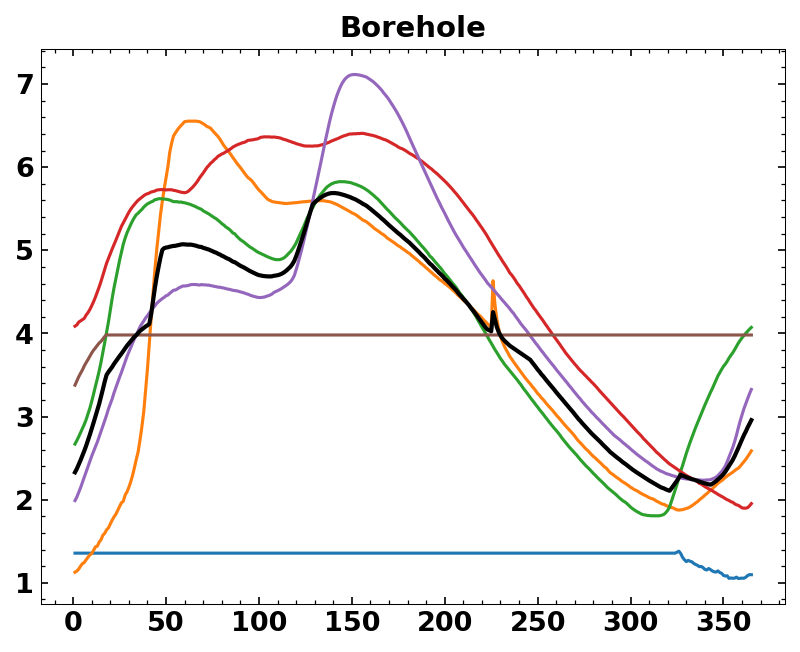

In [33]:
from re import X


years = np.array([_date.year for _date in lakelevel.index])
doy = np.array([UTCDateTime(_date).julday for _date in lakelevel.index])
years_unique = np.arange(2007, 2024)

x_data = []
y_data = []
for year in years_unique:
    # collect data to compute median
    x_data.append(doy[years==year])
    y_data.append(lakelevel['rel_LakeLevel(meter)'][years==year])

# intepolate all these curves for the same doys
xq = np.arange(1, 366)
yq = np.zeros((len(years_unique), len(xq)))
for ii, (x_datum, y_datum) in enumerate(zip(x_data, y_data)):
    yq[ii] = \
        np.interp(xq, x_datum, y_datum)
    # demean
    # yq[ii] -= np.nanmean(yq[ii])
annual_lakelevel = yq
plt.figure()
plt.title('Lake Level')
plt.plot(xq, yq.T)
# plot the median
plt.plot(xq, np.nanmedian(yq, axis=0), 'k', linewidth=2)

# do the same for snow depth
years = np.array([_date.year for _date in weather.index])
doy = np.array([UTCDateTime(_date).julday for _date in weather.index])
years_unique = np.arange(2007, 2024)

x_data = []
y_data = []
for year in years_unique:
    # collect data to compute median
    x_data.append(doy[years==year])
    y_data.append(weather['Snow Water Equivalent (m)'][years==year])

# intepolate all these curves for the same doys
xq = np.arange(1, 366)
yq = np.zeros((len(years_unique), len(xq)))
for ii, (x_datum, y_datum) in enumerate(zip(x_data, y_data)):
    yq[ii] = \
        np.interp(xq, x_datum, y_datum)
    # demean
    # yq[ii] -= np.nanmean(yq[ii])
annual_snowdepth = yq
plt.figure()
plt.title('Snow Depth')
plt.plot(xq, yq.T)
plt.plot(xq, np.nanmedian(yq, axis=0), 'k', linewidth=2)

# do the same for borehole
years = np.array([_date.year for _date in borehole.index])
doy = np.array([UTCDateTime(_date).julday for _date in borehole.index])
years_unique = np.unique(years)

x_data = []
y_data = []

for year in years_unique:
    # collect data to compute median
    x_data.append(doy[years==year])
    y_data.append(borehole['rel_borehole(meter)'][years==year])

# intepolate all these curves for the same doys
xq = np.arange(1, 366)
yq = np.zeros((len(years_unique), len(xq)))
for ii, (x_datum, y_datum) in enumerate(zip(x_data, y_data)):
    yq[ii] = \
        np.interp(xq, x_datum, y_datum)
    # demean
    # yq[ii] -= np.nanmean(yq[ii])
annual_borehole = yq
plt.figure()
plt.title('Borehole')
plt.plot(xq, yq.T)
plt.plot(xq, np.nanmedian(yq, axis=0), 'k', linewidth=2)

# save the data to npz
outfile = './annual_waterlevel.npz'
np.savez(outfile, annual_lakelevel=annual_lakelevel,
         annual_snowdepth=annual_snowdepth,
         annual_borehole=annual_borehole, annual_T=annual_T)